<a href="https://colab.research.google.com/github/andrewsundberg/DS301/blob/master/Lab4_DivorcePredictor_AndrewSundberg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from subproess import check_call
from graphviz import Source
from sklearn.tree

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/asukul/DS301-f19/master/datasets/divorce/divorce-csv.csv")

In [0]:
y = df["Class"]

In [0]:
X = df.loc[:, df.columns != "Class"]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [0]:
clf = DecisionTreeClassifier(max_depth = 1)

In [0]:
clf = clf.fit(X_train,y_train)

In [0]:
y_pred = clf.predict(X_test)

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9607843137254902


[Text(167.4, 163.07999999999998, 'X[17] <= 1.5\ngini = 0.498\nsamples = 119\nvalue = [63, 56]'),
 Text(83.7, 54.360000000000014, 'gini = 0.031\nsamples = 64\nvalue = [63, 1]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 55\nvalue = [0, 55]')]

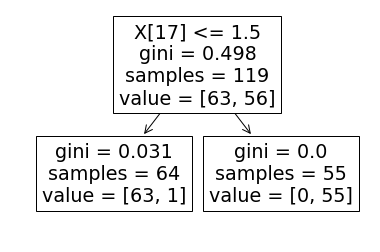

In [0]:
tree.plot_tree(clf.fit(X_train, y_train))


In [0]:
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont


In [0]:
pip install graphviz

In [0]:
pip install pydotplus

In [0]:
# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(clf,
                              out_file=f,
                              max_depth = 20,
                              impurity = True,
                              feature_names = list(df.drop(['Class'], axis=1)),
                              class_names = ['Potential divorce', 'Healthy Marriage'],
                              rounded = True,
                              filled= True )
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

0

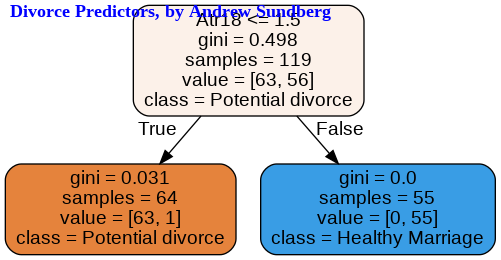

In [0]:
# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
font = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', 18)
draw.text((10, 0), # Drawing offset (position)
          'Divorce Predictors, by Andrew Sundberg', # Text to draw
          (0,0,255), # RGB desired color
          font=font) # ImageFont object with desired font
img.save('sample-out.png')
PImage("sample-out.png")
